In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from PIL import Image
import urllib.request
import plotly.graph_objs as go
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
# reading the player dataset
df_players = pd.read_csv('/content/player_data.csv', encoding='latin1')

# reading the match dataset
df = pd.read_csv('/content/full_data.csv', delimiter=',')
# adding a custom column based on the goals scored if the team won or not.
df['WIN'] = df.apply(lambda row: 1 if row['WIN'] == 'Home' else (-1 if row['WIN'] == 'Away' else 0), axis=1)
# Remove the percentage sign and convert the values to integers
df['H_Ball_Possession'] = df['H_Ball_Possession'].str.replace('%', '').astype(float)
df['A_Ball_Possession'] = df['A_Ball_Possession'].str.replace('%', '').astype(float)

In [2]:
def plot_pentagon(player_data):
    # Extract goalkeeper stats
    stats = player_data[['Goalkeeper_Diving', 'Goalkeeper_Handling', 'Goalkeeper_Kicking', 'Goalkeeper_Positioning', 'Goalkeeper_Reflexes']]
    # Calculate the angle between each point on the pentagon
    angles = [n / 5 * 2 * math.pi for n in range(5)]
    angles += angles[:1]
    # Create the figure and plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
    # Plot each stat as a point on the pentagon
    stats = list(stats.iloc[0])
    stats += stats[:1]
    ax.plot(angles, stats, linewidth=2, linestyle='solid')
    ax.fill(angles, stats, alpha=0.4)
    # Set the axis limits and labels
    ax.set_ylim(0, 100)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Diving', 'Handling', 'Kicking', 'Positioning', 'Reflexes'])
    ax.set_yticklabels([])
    plt.show()

def plot_hexagon(player_data):
    # Extract outfielder stats
    stats = player_data[['Pace_Total', 'Shooting_Total', 'Passing_Total', 'Dribbling_Total', 'Defending_Total', 'Physicality_Total']]
    # Calculate the angle between each point on the hexagon
    angles = [n / 6 * 2 * math.pi for n in range(6)]
    angles += angles[:1]
    # Create the figure and plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
    # Plot each stat as a point on the hexagon
    stats = list(stats.iloc[0])
    stats += stats[:1]
    ax.plot(angles, stats, linewidth=2, linestyle='solid', label='Player Stats')
    ax.fill(angles, stats, alpha=0.4)
    # Set the axis limits and labels
    ax.set_ylim(0, 100)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality'])
    ax.set_yticklabels([])
    ax.legend(loc='upper right')
    plt.show()

def find_player(name):
    # Find the player matching the input name using "LIKE" function
    player_data = df_players[df_players['Full_Name'] == name]
    if player_data.empty:
        player_data = df_players[df_players['Known_As'] == name]
    if player_data.empty:
        print ("No player found")
    # Print player details
    else:
      #print(player_data[['Known_As', 'Overall', 'Potential', 'Best_Position', 'National_Team_Name', 'Age', 'Height', 'Weight', 'Club_Name']].to_string(index=False))
      table = player_data[['Known_As', 'Overall', 'Potential', 'Best_Position', 'National_Team_Name', 'Age', 'Height', 'Weight', 'Club_Name']].to_dict('records')
      print(tabulate(table, headers='keys', tablefmt='fancy_grid'))
      # Plot the appropriate shape based on the player's position
      if player_data['Best_Position'].iloc[0] == 'GK':
          plot_pentagon(player_data)
      else:
          plot_hexagon(player_data)


In [3]:
def display_player_info(name):
  find_player(name)


In [4]:
def find_team(name):
    # Find the team matching the input name in 'Club_Name' or 'National_Team_Name' columns
    team_data = df_players[df_players['Club_Name'].fillna('').str.contains(name, case=False, regex=True)]
    if team_data.empty:
        print(f"No team found in player stats for {name}")
        return pd.DataFrame()
    else:
        return team_data

In [5]:
def display_team_stats(team_name, att_strength,mid_strength,def_strength,gk_strength):
  # Create data for bar chart
  teams = ['Attack', 'Midfield', 'Defence', 'Goalkeeper']
  strengths = [att_strength, mid_strength, def_strength, gk_strength]

  # Create stacked bar chart
  sns.set_style("whitegrid")
  plt.figure(figsize=(8, 6))
  p1 = plt.bar(teams, strengths, color='#5D8AA8')
  plt.title('Team Strengths', fontsize=16, fontweight='bold')
  plt.xlabel(team_name, fontsize=14)
  plt.ylabel('Strength', fontsize=14)

  # Add values for each section of the stacked bar chart
  for i, v in enumerate(strengths):
      plt.text(i, v+1, str(round(v,2)), ha='center', fontsize=12)

  plt.show()

In [6]:
def display_comparative_stats(team1_stats, team2_stats):
    team1_name = team1_stats[0]
    team2_name = team2_stats[0]

    # Create data for bar chart
    teams = ['Attack', 'Midfield', 'Defence', 'Goalkeeper']
    team1_strengths = team1_stats[1:]
    team2_strengths = team2_stats[1:]

    # Set up the data for seaborn
    data = {'Teams': teams + teams,
            'Strengths': team1_strengths + team2_strengths,
            'Team': [team1_name]*4 + [team2_name]*4}

    # Create grouped bar plot
    sns.set_style('whitegrid')
    plt.figure(figsize=(8,6))
    sns.barplot(x='Teams', y='Strengths', hue='Team', data=data, alpha=0.5)
    plt.title('Team Strengths Comparison', fontsize=16, fontweight='bold')
    plt.xlabel('Team Strengths', fontsize=14)
    plt.ylabel('Strength', fontsize=14)

    # Add values for each section of the grouped bar plot
    for i, v in enumerate(team1_strengths):
        plt.text(i-0.2, v+1, str(round(v, 2)), ha='center', fontsize=12)

    for i, v in enumerate(team2_strengths):
        plt.text(i+0.2, v+1, str(round(v, 2)), ha='center', fontsize=12)

    plt.show()

In [7]:
def find_average(dataframe):
  total, ctr = 0,0
  for val in dataframe:
    if val > (dataframe.mean() + 5):
      total += val
      ctr += 1
  return total/ctr

def team_calculations(team_name):
  team_df = find_team(team_name)
  if team_df.empty:
    return [60,60,60,60]
  goalkeeper_df = team_df[["Goalkeeper_Diving" , "Goalkeeper_Handling" , "Goalkeeper_Kicking" , "Goalkeeper_Positioning", "Goalkeeper_Reflexes"]]
  attack_df = team_df[["Crossing", "Finishing", "Heading_Accuracy", "Volleys", "Dribbling", "Curve"]]
  mid_df = team_df[[ "Short_Passing", "Long_Passing"]]
  defence_df = team_df[["Marking",	"Standing_Tackle",	"Sliding_Tackle"]]
  common_df = team_df[["Pace_Total", "Shooting_Total", "Passing_Total"	,"Dribbling_Total"	,"Defending_Total", "Physicality_Total" ,"Freekick_Accuracy" ,"Ball_Control" ,"Shot_Power",
"Jumping",	"Stamina",	"Strength", "Positioning" ,"Penalties"]]
  # finding average strength in context of each factor (attack, defence)
  attack_df['Average_attack'] = attack_df.mean(axis=1)
  #print(f"The Attacking strength: {find_average(attack_df['Average_attack'])}.")
  mid_df['Average_mid'] = mid_df.mean(axis=1)
  #print(f"The midfield strength: {find_average(mid_df['Average_mid'])}.")
  defence_df['Average_defence'] = defence_df.mean(axis=1)
  #print(f"The defence strength: {find_average(defence_df['Average_defence'])}.")
  goalkeeper_df['Average_goalkeeper'] = goalkeeper_df.mean(axis = 1)
  #print(f"The Goalkeeper strength: {find_average(goalkeeper_df['Average_goalkeeper'])}.")
  att_strength = find_average(attack_df['Average_attack'])
  mid_strength = find_average(mid_df['Average_mid'])
  def_strength = find_average(defence_df['Average_defence'])
  gk_strength = find_average(goalkeeper_df['Average_goalkeeper'])
  return [att_strength, mid_strength, def_strength, gk_strength]
  # display_team_stats(team_name, att_strength,mid_strength,def_strength,gk_strength)

    
  

In [8]:
def get_team_info(name):
  team_stat = team_calculations(name)
  display_team_stats(name, team_stat[0], team_stat[1], team_stat[2], team_stat[3])

def compare_teams(team1, team2):
  team_stat1 = team_calculations(team1)
  team_stat2 = team_calculations(team2)
  display_comparative_stats([team1]+team_stat1, [team2]+team_stat2 )

In [9]:
def findTeam(name, code):
    # Find the team matching the input name in 'Club_Name' or 'National_Team_Name' columns
    if code == 1:
      team_data = df[df['Home'].str.contains(name, case=False)]
    else:
      team_data = df[df['Away'].str.contains(name, case=False)]
      
    if team_data.empty:
        print("No team found in Match stats")
    else:
        return team_data

In [10]:
def get_away_dataframe(team_name):
  away_dataframe = findTeam(team_name, 2)
  away_dataframe = away_dataframe.drop(columns=["League", "INC", "Time", "H_Score", "WIN", "H_Ball_Possession", "H_Goal_Attempts", "H_Shots_on_Goal", "H_Attacks", "H_Dangerous_Attacks","H_Shots_off_Goal",
                                      "A_Shots_off_Goal", "H_Blocked_Shots","A_Blocked_Shots","H_Free_Kicks", "A_Free_Kicks","H_Corner_Kicks", "A_Corner_Kicks","H_Offsides", "A_Offsides",
                                      "H_Goalkeeper_Saves","H_Fouls", "H_Yellow_Cards", "A_Yellow_Cards"])
  away_dataframe['Opponent_attacking_strength'] = 0
  away_dataframe['Opponent_midfield_strength'] = 0
  away_dataframe['Opponent_defence_strength'] = 0
  away_dataframe['Opponent_gk_strength'] = 0
  for index, row in away_dataframe.iterrows():
    home_team = row['Home']
    home_values = team_calculations(str(home_team))
    away_dataframe.at[index, 'Opponent_attacking_strength'] = home_values[0]
    away_dataframe.at[index, 'Opponent_midfield_strength'] = home_values[1]
    away_dataframe.at[index, 'Opponent_defence_strength'] = home_values[2]
    away_dataframe.at[index, 'Opponent_gk_strength'] = home_values[3]
  return away_dataframe

def get_home_dataframe(team_name):
  home_dataframe = findTeam(team_name, 1)
  home_dataframe = home_dataframe.drop(columns=["League", "INC", "Time", "A_Score", "WIN", "A_Ball_Possession", "A_Goal_Attempts", "A_Shots_on_Goal", "A_Attacks", "A_Dangerous_Attacks","H_Shots_off_Goal",
                                      "A_Shots_off_Goal", "H_Blocked_Shots","A_Blocked_Shots","H_Free_Kicks", "A_Free_Kicks","H_Corner_Kicks", "A_Corner_Kicks","H_Offsides", "A_Offsides",
                                      "A_Goalkeeper_Saves","A_Fouls", "H_Yellow_Cards", "A_Yellow_Cards"])
  home_dataframe['Opponent_attacking_strength'] = 0
  home_dataframe['Opponent_midfield_strength'] = 0
  home_dataframe['Opponent_defence_strength'] = 0
  home_dataframe['Opponent_gk_strength'] = 0
  for index, row in home_dataframe.iterrows():
    away_team = row['Away']
    away_values = team_calculations(str(away_team))
    home_dataframe.at[index, 'Opponent_attacking_strength'] = away_values[0]
    home_dataframe.at[index, 'Opponent_midfield_strength'] = away_values[1]
    home_dataframe.at[index, 'Opponent_defence_strength'] = away_values[2]
    home_dataframe.at[index, 'Opponent_gk_strength'] = away_values[3]

  return home_dataframe


In [11]:
def calculate_regression_performance(y_true, y_pred):
    performance = []

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    performance.append(mse)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    performance.append(rmse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    performance.append(mae)

    # Calculate R-squared (R²)
    r2 = r2_score(y_true, y_pred)
    performance.append(r2 if r2 > 0 else 1)

    return performance

In [12]:
def predict_goals_regression(home_dataframe, away_dataframe):
    # Filter the dataframes based on the home and away teams
    home_data = home_dataframe[home_dataframe['Home'] == home_team]
    away_data = away_dataframe[away_dataframe['Away'] == away_team]

    # Prepare the training data
    X_home = home_data.iloc[:, 4:15]  # Features for the home team
    y_home = home_data['H_Score']     # Target variable for the home team

    X_away = away_data.iloc[:, 4:15]  # Features for the away team
    y_away = away_data['A_Score']     # Target variable for the away team
    min_dataset_size = 10  # Minimum dataset size threshold

# Adjust the test size if the dataset size is smaller than the threshold
    min_dataset_size = 10  # Minimum dataset size threshold

# Check if the dataset size is smaller than the threshold
    if len(X_home) < min_dataset_size or len(X_away) < min_dataset_size:
        # Adjust the test size to accommodate the small dataset
        test_size = min(0.2, len(X_home) / (len(X_home) + len(X_away))) if len(X_home) > 0 else 0.2
    else:
        # Calculate the test size dynamically
        test_size = min(0.2, 1.0 / max(len(X_home), len(X_away)))

    # Perform the train-test split
    X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, test_size=test_size, random_state=42)
    X_away_train, X_away_test, y_away_train, y_away_test = train_test_split(X_away, y_away, test_size=test_size, random_state=42)

    # Create an imputer and fit on the training data for home team
    imputer_home = SimpleImputer(strategy='mean')
    X_home_train_imputed = imputer_home.fit_transform(X_home_train)
    X_home_test_imputed = imputer_home.transform(X_home_test)

    # Create an imputer and fit on the training data for away team
    imputer_away = SimpleImputer(strategy='mean')
    X_away_train_imputed = imputer_away.fit_transform(X_away_train)
    X_away_test_imputed = imputer_away.transform(X_away_test)

    # Train the model for home team
    home_model = LinearRegression()
    home_model.fit(X_home_train_imputed, y_home_train)

    # Train the model for away team
    away_model = LinearRegression()
    away_model.fit(X_away_train_imputed, y_away_train)

    # Predict the goals scored by both teams
    home_goals = home_model.predict(X_home_test_imputed)
    away_goals = away_model.predict(X_away_test_imputed)

    #return home_goals, away_goals
    home_performance = calculate_regression_performance(y_home_test, home_goals)

    # Calculate regression performance metrics for away team
    away_performance = calculate_regression_performance(y_away_test, away_goals)

    return home_goals, away_goals, home_performance, away_performance


In [13]:
def calculate_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_feature_names = [feature_names[i] for i in indices[:5]]  # Select top 5 features

    return top_feature_names

def predict_goals_random_forest(home_dataframe, away_dataframe):
  # Filter the dataframes based on the home and away teams
  home_data = home_dataframe[home_dataframe['Home'] == home_team]
  away_data = away_dataframe[away_dataframe['Away'] == away_team]

  # Prepare the training data
  X_home = home_data.iloc[:, 4:15]  # Features for the home team
  y_home = home_data['H_Score']     # Target variable for the home team

  X_away = away_data.iloc[:, 4:15]  # Features for the away team
  y_away = away_data['A_Score']     # Target variable for the away team

  # Split the data into training and testing sets
  min_dataset_size = 10  # Minimum dataset size threshold

  # Adjust the test size if the dataset size is smaller than the threshold
  if len(X_home) < min_dataset_size or len(X_away) < min_dataset_size:
      # Adjust the test size to accommodate the small dataset
      test_size = min(0.2, len(X_home) / (len(X_home) + len(X_away))) if len(X_home) > 0 else 0.2
  else:
      # Calculate the test size dynamically
      test_size = min(0.2, 1.0 / max(len(X_home), len(X_away)))

  # Perform the train-test split
  X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, test_size=test_size, random_state=42)
  X_away_train, X_away_test, y_away_train, y_away_test = train_test_split(X_away, y_away, test_size=test_size, random_state=42)

  # Create an imputer and fit on the training data for home team
  imputer_home = SimpleImputer(strategy='mean')
  X_home_train_imputed = imputer_home.fit_transform(X_home_train)
  X_home_test_imputed = imputer_home.transform(X_home_test)

  # Create an imputer and fit on the training data for away team
  imputer_away = SimpleImputer(strategy='mean')
  X_away_train_imputed = imputer_away.fit_transform(X_away_train)
  X_away_test_imputed = imputer_away.transform(X_away_test)

  # Train the model for home team
  home_model = RandomForestRegressor(random_state=42)
  home_model.fit(X_home_train_imputed, y_home_train)
  # Train the model for away team
  away_model = RandomForestRegressor(random_state=42)
  away_model.fit(X_away_train_imputed, y_away_train)

  # Predict the goals scored by both teams
  home_goals = home_model.predict(X_home_test_imputed)
  away_goals = away_model.predict(X_away_test_imputed)

  # Calculate regression performance metrics for home team
  home_performance = calculate_regression_performance(y_home_test, home_goals)

  # Calculate regression performance metrics for away team
  away_performance = calculate_regression_performance(y_away_test, away_goals)

  # Calculate feature importance for home team
  home_feature_importance = calculate_feature_importance(home_model, X_home.columns)

  # Calculate feature importance for away team
  away_feature_importance = calculate_feature_importance(away_model, X_away.columns)

  return home_goals, away_goals, home_performance, away_performance, home_feature_importance, away_feature_importance



1. Get player details
2. Get team details
3. Compare two teams
4. Predict results between two by using regression.
5. Predict results between two by using random forest.
Enter your choice: 2
Enter team's name: Real Madrid


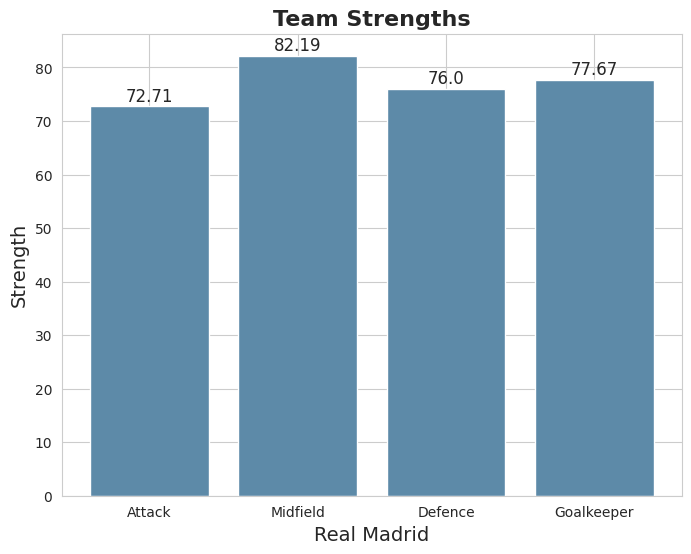

1. Get player details
2. Get team details
3. Compare two teams
4. Predict results between two by using regression.
5. Predict results between two by using random forest.
Enter your choice: 3
Enter first team's name: Real Madrid
Enter second team's name: Barcelona


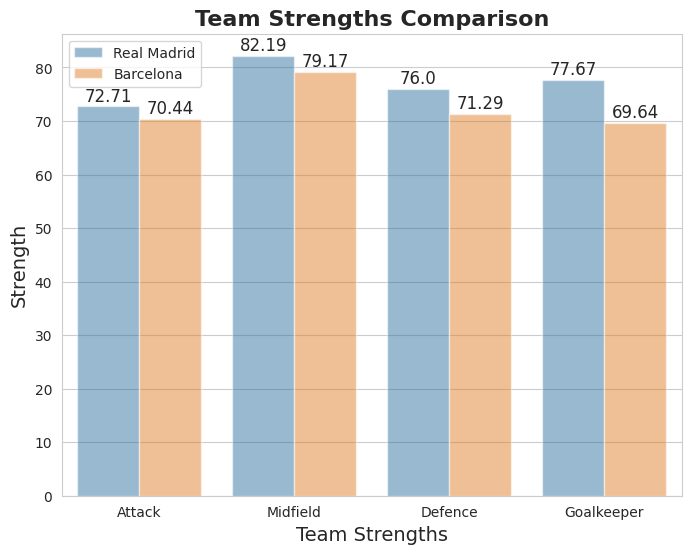

1. Get player details
2. Get team details
3. Compare two teams
4. Predict results between two by using regression.
5. Predict results between two by using random forest.
Enter your choice: 4
Enter home team's name: Real Madrid
Enter away team's name: Barcelona
No team found in player stats for Cadiz
No team found in player stats for Alaves
No team found in player stats for Cadiz


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


No team found in player stats for Alaves
Predicted goals for the Real Madrid team: 0
Predicted goals for the Barcelona team: 0
Home Team home_performance Report:
	 1. Mean Squared Error (MSE):5.207341673591853
	 2. Root Mean Squared Error (RMSE):2.2819600508317084
	 3. Mean Absolute Error (MAE):2.2819600508317084
	 4. Calculate R-squared (R²):1
Away Team away_performance Report:
	 1. Mean Squared Error (MSE):0.39234479418160195
	 2. Root Mean Squared Error (RMSE):0.6263743243313873
	 3. Mean Absolute Error (MAE):0.6263743243313873
	 4. Calculate R-squared (R²):1
1. Get player details
2. Get team details
3. Compare two teams
4. Predict results between two by using regression.
5. Predict results between two by using random forest.
Enter your choice: 5


KeyboardInterrupt: ignored

In [17]:
def print_performance(home_performance, away_performance):
  print("Home Team home_performance Report:")
  print(f"\t 1. Mean Squared Error (MSE):{home_performance[0]}")
  print(f"\t 2. Root Mean Squared Error (RMSE):{home_performance[1]}")
  print(f"\t 3. Mean Absolute Error (MAE):{home_performance[2]}")
  print(f"\t 4. Calculate R-squared (R²):{home_performance[3]}")
  print("Away Team away_performance Report:")
  print(f"\t 1. Mean Squared Error (MSE):{away_performance[0]}")
  print(f"\t 2. Root Mean Squared Error (RMSE):{away_performance[1]}")
  print(f"\t 3. Mean Absolute Error (MAE):{away_performance[2]}")
  print(f"\t 4. Calculate R-squared (R²):{away_performance[3]}")

while True:
  # Get the user's choice
  print("1. Get player details")
  print("2. Get team details")
  print("3. Compare two teams")
  print("4. Predict results between two by using regression.")
  print("5. Predict results between two by using random forest.")
  choice = int(input("Enter your choice: "))
  # Call the corresponding function based on the choice
  if choice not in [1,2,3,4,5]:
      print("Invalid choice")
  else:
    if choice == 1:
      name = input("Enter player's name: ")
      display_player_info(name)
    elif choice == 2:
      name = input("Enter team's name: ")
      get_team_info(name)
    elif choice == 3:
      name1 = input("Enter first team's name: ")
      name2 = input("Enter second team's name: ")
      compare_teams(name1, name2)
    elif choice == 4:
      home_team = input("Enter home team's name: ")
      away_team = input("Enter away team's name: ")
      home_dataframe, away_dataframe = get_home_dataframe(home_team), get_away_dataframe(away_team)
      home_goals, away_goals, home_performance, away_performance = predict_goals_regression(home_dataframe, away_dataframe)
      h, a = int(math.floor(np.mean(home_goals))), int(math.floor(np.mean(away_goals)))
      print(f"Predicted goals for the {home_team} team:", h if h >=0 else 0)
      print(f"Predicted goals for the {away_team} team:", a if a >= 0 else 0)
      print_performance(home_performance, away_performance)

    elif choice == 5:
      home_team = input("Enter home team's name: ")
      away_team = input("Enter away team's name: ")
      home_dataframe, away_dataframe = get_home_dataframe(home_team), get_away_dataframe(away_team)
      home_goals, away_goals, home_performance, away_performance, home_feature_importance, away_feature_importance = predict_goals_random_forest(home_dataframe, away_dataframe)
      h, a = int(math.floor(np.mean(home_goals))), int(math.floor(np.mean(away_goals)))
      print(f"Predicted goals for the {home_team} team:", h if h >=0 else 0)
      print(f"Predicted goals for the {away_team} team:", a if a >= 0 else 0)
      print_performance(home_performance, away_performance)
      print("Features of home team that created impact:")
      print(f"\t{home_feature_importance}")
      print("Features of away team that created impact:")
      print(f"\t{away_feature_importance}")